In [ ]:
#QUESTION 1

In [5]:
import numpy as np
import pandas as pd
import math
x1=[2.781084,
1.465489,
3.396562,
1.38807,
3.064072,
7.627531,
5.332441,
6.922597,
8.675419,
7.673756]
x2=[2.550537,
2.362125,
4.400294,
1.85022,
3.005306,
2.759262,
2.088627,
1.771064,
-0.24207,
3.508563]
y=[0,
0,
0,
0,
0,
1,
1,
1,
1,
1]
df=pd.DataFrame({'x1':x1,'x2':x2,'y':y})
df

,x1,x2,y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,-0.242070,1
9,7.673756,3.508563,1


In [8]:
from sklearn.linear_model import LogisticRegression
X = df[['x1', 'x2']]
Y = df['y']
model = LogisticRegression()
model.fit(X, Y)
b0 = model.intercept_[0]
b1, b2 = model.coef_[0]
print(f'Intercept (B0): {B0}')
print(f'Coefficient for X1 (B1): {B1}')
print(f'Coefficient for X2 (B2): {B2}')


Intercept (B0): -4.551633521124653
Coefficient for X1 (B1): 1.183834155636202
Coefficient for X2 (B2): -0.35803502860018704


In [70]:
prediction=[0,0,0,0,0,0,0,0,0,0]
pred=[0]*10
loss=[0]*10
for i in range (10):
    prediction[i] = 1 / (1 + math.exp((-(b0 + b1*x1[i] + b2*x2[i]))))
    if (prediction[i]>=0.5):
        pred[i]=1
    else:
        pred[i]=0  
    log_loss = -np.mean(y[i] * np.log(prediction[i]) + (1 - y[i]) * np.log(1 - prediction[i]))
    loss[i]=y[i] * np.log(prediction[i]) + (1 - y[i]) * np.log(1 - prediction[i])

In [71]:
y1=Y.to_numpy()
log_loss

0.0370599036730744

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y1, pred))
print("\nClassification Report:")
print(classification_report(y1, pred))

Confusion Matrix:
[[5 0]
 [0 5]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [73]:
loss

[-0.10786343710322566,
 -0.02534533690103821,
 -0.11485292988795857,
 -0.027743977869036908,
 -0.1268940124592168,
 -0.030039470330351387,
 -0.3097046132086544,
 -0.04814023426500874,
 -0.003007045497936586,
 -0.0370599036730744]

In [74]:
beta = [x / 10 for x in range(1, 11)]

In [75]:
prediction

[0.1022498125742718,
 0.02502684032438537,
 0.10850275313408725,
 0.027362648385509735,
 0.11917297565982612,
 0.970407230498633,
 0.7336636387683158,
 0.9530001344329782,
 0.9969974711350023,
 0.9636184093379092]

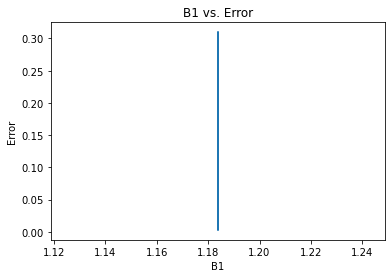

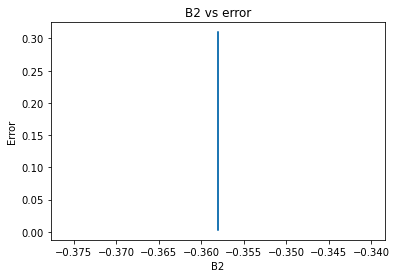

In [84]:
parameters_and_errors = []
for i in range(len(df)):
    instance = df.iloc[i]
    X1_value = instance['x1']
    X2_value = instance['x2']
    Y_value = instance['y']
    predictions = prediction[i]
    error = - (Y_value * np.log(predictions) + (1 - Y_value) * np.log(1 - predictions))
    parameters_and_errors.append((X1_value, X2_value, B0, B1, B2, predictions, error))

# For example, to plot B1 vs. Error
B1_values = [item[3] for item in parameters_and_errors]
errors = [item[6] for item in parameters_and_errors]
B2_values = [item[4]for item in parameters_and_errors]
plt.plot(B1_values, errors)
plt.xlabel('B1')
plt.ylabel('Error')
plt.title('B1 vs. Error')
plt.show()
plt.plot(B2_values, errors)
plt.xlabel('B2')
plt.ylabel('Error')
plt.title('B2 vs error')
plt.show()


In [ ]:
#QUESTION 2

Intercept (B0): -4.551633521124653
Coefficient for X1 (B1): 1.183834155636202
prediction
 [0.09011843087420256, 0.019369574767893347, 0.17394784416907869, 0.01764723237807845, 0.12288607383137673, 0.974100253490875, 0.6930840238300584, 0.9406635985967389, 0.9926923584787827, 0.9754917334436186]
pred
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
loss
 0.02481359312851262
Confusion Matrix:
[[5 0]
 [0 5]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



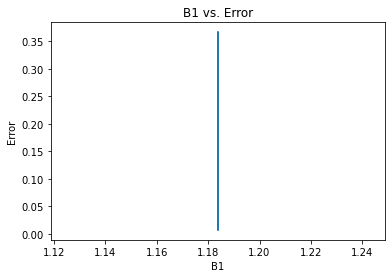

In [95]:
from sklearn.linear_model import LogisticRegression
X = df['x1'].to_numpy().reshape(-1,1)
Y = df['y'].to_numpy()

model = LogisticRegression()
model.fit(X, Y)
b0 = model.intercept_[0]
b1= model.coef_[0]
print(f'Intercept (B0): {B0}')
print(f'Coefficient for X1 (B1): {B1}')
prediction=[0,0,0,0,0,0,0,0,0,0]
pred=[0]*10
loss=[0]*10
for i in range (10):
    prediction[i] = 1 / (1 + math.exp((-(b0 + b1*x1[i] ))))
    if (prediction[i]>=0.5):
        pred[i]=1
    else:
        pred[i]=0  
    log_loss = -np.mean(y[i] * np.log(prediction[i]) + (1 - y[i]) * np.log(1 - prediction[i]))
    loss[i]=y[i] * np.log(prediction[i]) + (1 - y[i]) * np.log(1 - prediction[i])
print('prediction\n',prediction)
print('pred\n',pred)
print('loss\n',log_loss)
print("Confusion Matrix:")
print(confusion_matrix(Y, pred))
print("\nClassification Report:")
print(classification_report(Y, pred))
parameters_and_errors = []
for i in range(len(df)):
    instance = df.iloc[i]
    X1_value = instance['x1']
    Y_value = instance['y']
    predictions = prediction[i]
    error = - (Y_value * np.log(predictions) + (1 - Y_value) * np.log(1 - predictions))
    parameters_and_errors.append((X1_value, X2_value, B0, B1, B2, predictions, error))

# For example, to plot B1 vs. Error
B1_values = [item[3] for item in parameters_and_errors]
errors = [item[6] for item in parameters_and_errors]
plt.plot(B1_values, errors)
plt.xlabel('B1')
plt.ylabel('Error')
plt.title('B1 vs. Error')
plt.show()

/tmp/ipykernel_4334/2533538379.py:2: RuntimeWarning: divide by zero encountered in log
  yab = -np.log(1-xab) #Plotting a vertical line at x=0:


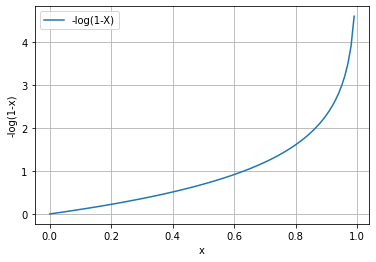

In [99]:
xab= np.linspace(0,1,100) 
yab = -np.log(1-xab) 
plt.plot(xab,yab,label="-log(1-X)")
plt.xlabel("x") 
plt.ylabel("-log(1-x)") 
plt.legend() 
plt.grid() 
plt.show()

/tmp/ipykernel_4334/1519483183.py:2: RuntimeWarning: divide by zero encountered in log
  yab = -np.log(xab) #Plotting a vertical line at x=0:


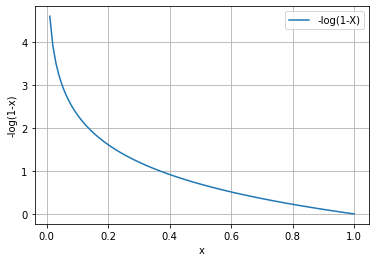

In [100]:
xab= np.linspace(0,1,100) 
yab = -np.log(xab) 
plt.plot(xab,yab,label="-log(X)")
plt.xlabel("x") 
plt.ylabel("-log(1-x)") 
plt.legend() 
plt.grid() 
plt.show()

/tmp/ipykernel_4334/2108430089.py:2: RuntimeWarning: divide by zero encountered in log
  yab = -np.log(1-xab)
/tmp/ipykernel_4334/2108430089.py:3: RuntimeWarning: divide by zero encountered in log
  zab= -np.log(xab)


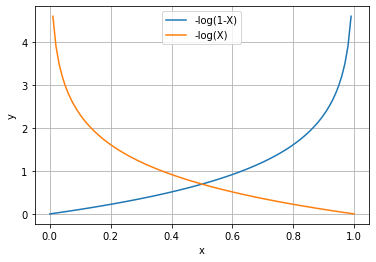

In [101]:
xab= np.linspace(0,1,100) 
yab = -np.log(1-xab) 
zab= -np.log(xab) 
plt.plot(xab,yab,label="-log(1-X)")
plt.plot(xab,zab,label="-log(X)")
plt.xlabel("x") 
plt.ylabel("y") 
plt.legend() 
plt.grid() 
plt.show()

In [102]:
#QUESTION3

In [117]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

B0 = 0
B1 = 0
B2 = 0

learning_rate = 0.01

for iteration in range(5):
    for i in range(10):
        z = B0 + B1*x1[i] + B2*x2[i]
        prediction = sigmoid(z)
        error = y[i] - prediction
        B0 += learning_rate * error
        B1 += learning_rate * error * x1[i]
        B2 += learning_rate * error * x2[i]
xq3=df['x1']
x2q3=df['x2']
yq3=df['y']
xq3=xq3.to_numpy()
x2q3=x2q3.to_numpy()
yq3=yq3.to_numpy()
predq4=[0]*10
print(f'Intercept (B0): {B0}')
print(f'Coefficient for X1 (B1): {B1}')
print(f'Coefficient for X2 (B2): {B2}')
zq3=B0 + B1*xq3 + B2*x2q3
predq3=1 / (1 + np.exp(-zq3))
print("prediction\n",predq3)
errorq3 = yq3 - predq3
print("errors\n",errorq3)
for i in range (10):
    if (predq3[i]>=0.5):
        predq4[i]=1
    else:
        predq4[i]=0 
print('prediction in 0,1\n',predq4)
print("Confusion Matrix:")
print(confusion_matrix(y, predq4))
print("\nClassification Report:")
print(classification_report(y, predq4))

Intercept (B0): -0.044714801992765146
Coefficient for X1 (B1): 0.26989951542847923
Coefficient for X2 (B2): -0.1837374418033998
prediction
 [0.5590406  0.47921428 0.51587388 0.4974925  0.55726994 0.81861208
 0.73316679 0.8173178  0.91223653 0.79927573]
errors
 [-0.5590406  -0.47921428 -0.51587388 -0.4974925  -0.55726994  0.18138792
  0.26683321  0.1826822   0.08776347  0.20072427]
prediction in 0,1
 [1, 0, 1, 0, 1, 1, 1, 1, 1, 1]
Confusion Matrix:
[[2 3]
 [0 5]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.62      1.00      0.77         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10



In [124]:
#e Using scikit-learn for comparison
clf = LogisticRegression(max_iter=num_epochs * int(10 / batch_size))
clf.fit(X, Y)
sklearn_accuracy = clf.score(X, Y)
print("\nScikit-learn Logistic Regression:")
print("B0:", clf.intercept_[0])
print("B1:", clf.coef_[0][0])
print("B2:", clf.coef_[0][1])
print("Accuracy:", sklearn_accuracy)



Scikit-learn Logistic Regression:
B0: -2.1286165479492443
B1: 1.151064643003772
B2: -0.8996873324492398
Accuracy: 1.0


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
